# Evaluation of CNNs on Graffitied Traffic Signs Classification
### Yanqin Wu (yw4359)
### Kayan Shih (ks5250)


# **Import Data From Kaggle**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
! mkdir ~/.kaggle
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets download -d ahemateja19bec1025/traffic-sign-dataset-classification

 94% 178M/190M [00:01<00:00, 138MB/s]
100% 190M/190M [00:01<00:00, 142MB/s]


In [7]:
! unzip traffic-sign-dataset-classification.zip

流式输出内容被截断，只能显示最后 5000 行内容。
  inflating: traffic_Data/DATA/24/024_1_0040.png  
  inflating: traffic_Data/DATA/24/024_1_0041.png  
  inflating: traffic_Data/DATA/24/024_1_0042.png  
  inflating: traffic_Data/DATA/24/024_1_0043.png  
  inflating: traffic_Data/DATA/24/024_1_0044.png  
  inflating: traffic_Data/DATA/24/024_1_0045.png  
  inflating: traffic_Data/DATA/24/024_1_0046.png  
  inflating: traffic_Data/DATA/24/024_1_0047.png  
  inflating: traffic_Data/DATA/24/024_1_0048.png  
  inflating: traffic_Data/DATA/24/024_1_0049.png  
  inflating: traffic_Data/DATA/25/025_0001.png  
  inflating: traffic_Data/DATA/25/025_1_0001.png  
  inflating: traffic_Data/DATA/26/026_0001.png  
  inflating: traffic_Data/DATA/26/026_0002.png  
  inflating: traffic_Data/DATA/26/026_0003.png  
  inflating: traffic_Data/DATA/26/026_0004.png  
  inflating: traffic_Data/DATA/26/026_0005.png  
  inflating: traffic_Data/DATA/26/026_0006.png  
  inflating: traffic_Data/DATA/26/026_0007.png  
  inflating: traffic

# **Read Data**

In [8]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
import tensorflow as tf

In [10]:
# train set
dataset_path = "/content/traffic_Data/DATA"
label_path = '/content/labels.csv'
label = pd.read_csv(label_path)
train_ds = tf.keras.preprocessing.image_dataset_from_directory(dataset_path,
                                                               validation_split=0.2,
                                                               subset='training',
                                                               image_size=(224,224),
                                                               seed=123,
                                                               batch_size=32)

Found 4170 files belonging to 58 classes.
Using 3336 files for training.


In [11]:
# validation set
val_ds = tf.keras.preprocessing.image_dataset_from_directory(dataset_path,
                                                             validation_split=0.2,
                                                             subset='validation',
                                                             image_size=(224,224),
                                                             seed=123,
                                                             batch_size=32)

Found 4170 files belonging to 58 classes.
Using 834 files for validation.


In [12]:
class_numbers = train_ds.class_names
class_names = []
for i in class_numbers:
 class_names.append(label['Name'][int(i)])

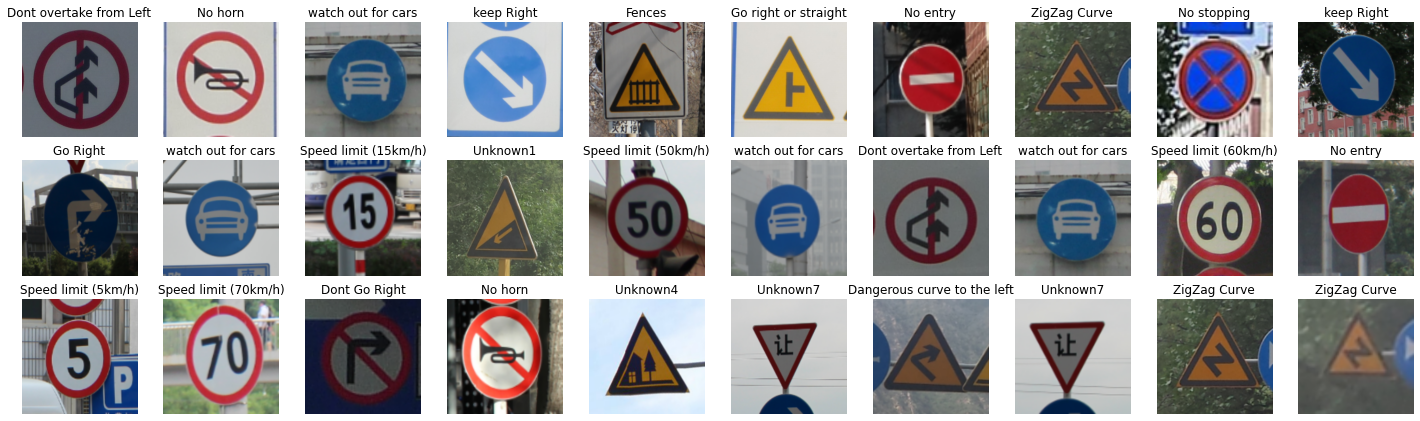

In [13]:
# sample images
plt.figure(figsize=(25, 25))
for images, labels in train_ds.take(1):
  for i in range(30):
    ax = plt.subplot(10, 10, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

plt.show()

# **Data Preprocessing**

# **Models**

## LeNet-5

In [14]:
import keras
from tensorflow import keras
import keras.layers as layers
from keras.models import Sequential,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from tensorflow.keras.callbacks import EarlyStopping

In [15]:
data_augmentation = tf.keras.Sequential(
  [
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal",input_shape=(224,224,3)),
    tf.keras.layers.experimental.preprocessing.RandomFlip("vertical"),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.2),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.3),
  
   tf.keras.layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical")
  ]
)

In [16]:
LeNet_model = keras.Sequential()
LeNet_model.add(data_augmentation)
LeNet_model.add(Rescaling(1./255))
LeNet_model.add(layers.Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(32,32,1)))
LeNet_model.add(layers.AveragePooling2D())
LeNet_model.add(layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
LeNet_model.add(layers.AveragePooling2D())
LeNet_model.add(layers.Flatten())
LeNet_model.add(layers.Dense(units=120, activation='relu'))
LeNet_model.add(layers.Dense(units=84, activation='relu'))
LeNet_model.add(layers.Dense(units=58, activation = 'softmax'))
LeNet_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 222, 222, 6)       168       
                                                                 
 average_pooling2d (AverageP  (None, 111, 111, 6)      0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 16)      880       
                                                                 
 average_pooling2d_1 (Averag  (None, 54, 54, 16)       0         
 ePooling2D)                                          

In [17]:
LeNet_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),optimizer='adam' , metrics=['accuracy'])

In [18]:
# Set callback functions to early stop training 
mycallbacks = [EarlyStopping(monitor='val_loss', patience=5)]
hist = LeNet_model.fit(train_ds,validation_data=val_ds, epochs=7, callbacks=mycallbacks )

Epoch 1/7
105/105 [==============================] - 17s 60ms/step - loss: 2.7592 - accuracy: 0.2950 - val_loss: 2.1173 - val_accuracy: 0.3873
Epoch 2/7
105/105 [==============================] - 6s 58ms/step - loss: 1.9496 - accuracy: 0.4233 - val_loss: 1.7103 - val_accuracy: 0.4856
Epoch 3/7
105/105 [==============================] - 6s 58ms/step - loss: 1.6114 - accuracy: 0.5018 - val_loss: 1.4686 - val_accuracy: 0.5624
Epoch 4/7
105/105 [==============================] - 6s 58ms/step - loss: 1.3571 - accuracy: 0.5704 - val_loss: 1.2984 - val_accuracy: 0.6163
Epoch 5/7
105/105 [==============================] - 6s 58ms/step - loss: 1.2350 - accuracy: 0.5944 - val_loss: 1.1658 - val_accuracy: 0.6379
Epoch 6/7
105/105 [==============================] - 6s 58ms/step - loss: 1.0994 - accuracy: 0.6397 - val_loss: 1.1690 - val_accuracy: 0.6487
Epoch 7/7
105/105 [==============================] - 6s 58ms/step - loss: 1.0022 - accuracy: 0.6700 - val_loss: 1.0431 - val_accuracy: 0.6847


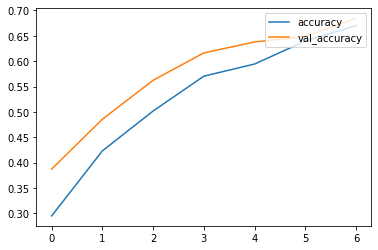

In [19]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'],loc='upper right')

## ResNet

In [20]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import GlobalAveragePooling2D

res_base_model = ResNet50(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

# Setting the Training of all layers of InceptionV3 model to false
res_base_model.trainable = False

94765736/94765736 [==============================] - 1s 0us/step


In [21]:
res_model = Sequential([
    data_augmentation,
    Rescaling(1./255),
    res_base_model,
    GlobalAveragePooling2D(),
    Dropout(0.15),
    Dense(1024, activation='relu'),
    Dense(58, activation='softmax') # 85 Output Neurons for 85 Classes
])

In [22]:
from tensorflow.keras import optimizers
opt = optimizers.Adam(learning_rate=0.001)

# Compiling and setting the parameters we want our model to use
res_model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=['accuracy'])

In [23]:
res_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense_3 (Dense)             (None, 1024)              2098176   
                                                      

In [24]:
# Set callback functions to early stop training 
mycallbacks1 = [EarlyStopping(monitor='val_loss', patience=5)]
hist_res = res_model.fit(train_ds,validation_data=val_ds, epochs=7, callbacks=mycallbacks1 )

Epoch 1/7
105/105 [==============================] - 14s 89ms/step - loss: 3.5920 - accuracy: 0.1118 - val_loss: 3.3427 - val_accuracy: 0.1127
Epoch 2/7
105/105 [==============================] - 8s 78ms/step - loss: 3.3410 - accuracy: 0.1388 - val_loss: 3.2051 - val_accuracy: 0.1379
Epoch 3/7
105/105 [==============================] - 8s 78ms/step - loss: 3.2561 - accuracy: 0.1526 - val_loss: 3.1274 - val_accuracy: 0.2110
Epoch 4/7
105/105 [==============================] - 8s 78ms/step - loss: 3.1760 - accuracy: 0.1814 - val_loss: 3.1003 - val_accuracy: 0.1930
Epoch 5/7
105/105 [==============================] - 8s 78ms/step - loss: 3.1339 - accuracy: 0.1844 - val_loss: 2.9678 - val_accuracy: 0.2062
Epoch 6/7
105/105 [==============================] - 8s 78ms/step - loss: 3.0581 - accuracy: 0.2089 - val_loss: 2.9003 - val_accuracy: 0.2230
Epoch 7/7
105/105 [==============================] - 8s 77ms/step - loss: 2.9953 - accuracy: 0.2245 - val_loss: 2.8479 - val_accuracy: 0.2458


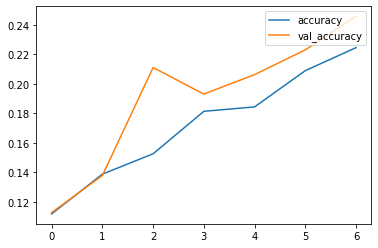

In [25]:
plt.plot(hist_res.history['accuracy'])
plt.plot(hist_res.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'],loc='upper right')

## VGG-16

In [26]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import GlobalAveragePooling2D

In [27]:
vgg_base_model = VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

# Setting the Training of all layers of InceptionV3 model to false
vgg_base_model.trainable = False

58889256/58889256 [==============================] - 0s 0us/step


In [28]:
vgg_model = Sequential([
    data_augmentation,
    Rescaling(1./255),
    vgg_base_model,
    GlobalAveragePooling2D(),
    Dropout(0.15),
    Dense(1024, activation='relu'),
    Dense(58, activation='softmax') # 85 Output Neurons for 85 Classes
])

In [29]:
from tensorflow.keras import optimizers
opt = optimizers.Adam(learning_rate=0.001)

# Compiling and setting the parameters we want our model to use
vgg_model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=['accuracy'])

In [30]:
vgg_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d_1   (None, 512)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 1024)              525312    
                                                      

In [31]:
# Set callback functions to early stop training 
mycallbacks1 = [EarlyStopping(monitor='val_loss', patience=5)]
hist_incept_vgg = vgg_model.fit(train_ds,validation_data=val_ds, epochs=7, callbacks=mycallbacks1 )


Epoch 1/7
105/105 [==============================] - 11s 85ms/step - loss: 2.6094 - accuracy: 0.3519 - val_loss: 1.7500 - val_accuracy: 0.5911
Epoch 2/7
105/105 [==============================] - 8s 79ms/step - loss: 1.5183 - accuracy: 0.5929 - val_loss: 1.2779 - val_accuracy: 0.6715
Epoch 3/7
105/105 [==============================] - 8s 79ms/step - loss: 1.1894 - accuracy: 0.6655 - val_loss: 0.9627 - val_accuracy: 0.7650
Epoch 4/7
105/105 [==============================] - 8s 79ms/step - loss: 0.9632 - accuracy: 0.7242 - val_loss: 0.8740 - val_accuracy: 0.7506
Epoch 5/7
105/105 [==============================] - 8s 79ms/step - loss: 0.8061 - accuracy: 0.7668 - val_loss: 0.7328 - val_accuracy: 0.7866
Epoch 6/7
105/105 [==============================] - 8s 79ms/step - loss: 0.7567 - accuracy: 0.7659 - val_loss: 0.6647 - val_accuracy: 0.8129
Epoch 7/7
105/105 [==============================] - 8s 79ms/step - loss: 0.6852 - accuracy: 0.7959 - val_loss: 0.5772 - val_accuracy: 0.8345


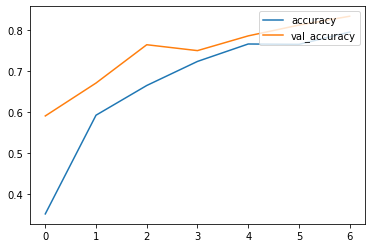

In [32]:
plt.plot(hist_incept_vgg.history['accuracy'])
plt.plot(hist_incept_vgg.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'],loc='upper right')

## Inception-V3

In [33]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.layers import Input
from tensorflow.keras import optimizers
# Initializing InceptionV3 (pretrained) model with input image shape as (300, 300, 3)
base_model = InceptionV3(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

# Setting the Training of all layers of InceptionV3 model to false
base_model.trainable = False

87910968/87910968 [==============================] - 0s 0us/step


In [34]:
inception_model = Sequential([
    data_augmentation,
    Rescaling(1./255),
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.15),
    Dense(1024, activation='relu'),
    Dense(58, activation='softmax') # 85 Output Neurons for 85 Classes
])

In [35]:
opt = optimizers.Adam(learning_rate=0.001)

# Compiling and setting the parameters we want our model to use
inception_model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=['accuracy'])

In [36]:
inception_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 rescaling_3 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 global_average_pooling2d_2   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_2 (Dropout)         (None, 2048)              0         
                                                                 
 dense_7 (Dense)             (None, 1024)              2098176   
                                                      

In [37]:
# Set callback functions to early stop training 
mycallbacks1 = [EarlyStopping(monitor='val_loss', patience=5)]
hist_incept = inception_model.fit(train_ds,validation_data=val_ds, epochs=7, callbacks=mycallbacks1 )

Epoch 1/7
105/105 [==============================] - 15s 92ms/step - loss: 1.5256 - accuracy: 0.6181 - val_loss: 0.8392 - val_accuracy: 0.7830
Epoch 2/7
105/105 [==============================] - 8s 74ms/step - loss: 0.6889 - accuracy: 0.7941 - val_loss: 0.6162 - val_accuracy: 0.8213
Epoch 3/7
105/105 [==============================] - 8s 74ms/step - loss: 0.5439 - accuracy: 0.8291 - val_loss: 0.4909 - val_accuracy: 0.8381
Epoch 4/7
105/105 [==============================] - 8s 75ms/step - loss: 0.4019 - accuracy: 0.8723 - val_loss: 0.4406 - val_accuracy: 0.8609
Epoch 5/7
105/105 [==============================] - 8s 74ms/step - loss: 0.3710 - accuracy: 0.8783 - val_loss: 0.3764 - val_accuracy: 0.8729
Epoch 6/7
105/105 [==============================] - 8s 74ms/step - loss: 0.3288 - accuracy: 0.8909 - val_loss: 0.3989 - val_accuracy: 0.8621
Epoch 7/7
105/105 [==============================] - 8s 74ms/step - loss: 0.3381 - accuracy: 0.8984 - val_loss: 0.4344 - val_accuracy: 0.8573


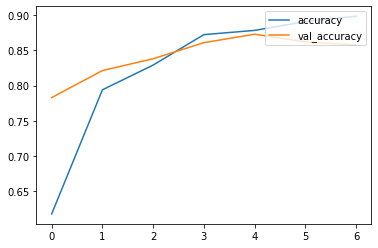

In [38]:
plt.plot(hist_incept.history['accuracy'])
plt.plot(hist_incept.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'],loc='upper right')

# **Overall**

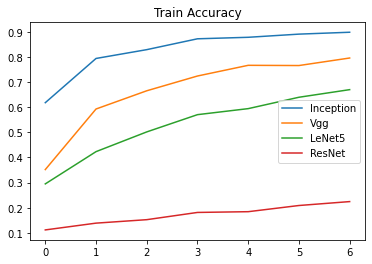

In [39]:
# inceptionv3
plt.title("Train Accuracy")

plt.plot(hist_incept.history['accuracy'],label = "Inception")

#vgg
plt.plot(hist_incept_vgg.history['accuracy'],label = "Vgg")

# LeNet5
plt.plot(hist.history['accuracy'],label = "LeNet5")

# Resnet
plt.plot(hist_res.history['accuracy'],label = "ResNet")

plt.legend()
plt.show()

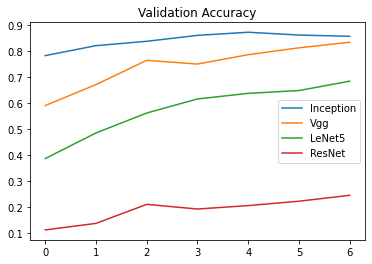

In [40]:
plt.title("Validation Accuracy")

plt.plot(hist_incept.history['val_accuracy'],label = "Inception")
plt.plot(hist_incept_vgg.history['val_accuracy'],label = "Vgg")
plt.plot(hist.history['val_accuracy'],label = "LeNet5")
plt.plot(hist_res.history['val_accuracy'],label = "ResNet")

plt.legend()
plt.show()


# **Making Predictions**

In [41]:
import numpy as np
img = keras.preprocessing.image.load_img(
    "/content/traffic_Data/TEST/000_0003_j.png", target_size=(224,224))

img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = LeNet_model.predict(img_array)

classes_x=np.argmax(predictions,axis=1)

1/1 [==============================] - 0s 129ms/step


In [42]:
for i in range(58):
  if predictions[0][i] == max(predictions[0]):
    print("Class: " , i , "Percentage: " , max(predictions[0]))

Class:  23 Percentage:  0.31315503


In [43]:
classes_x

array([23])

## **Graffiti**

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import time
import math
import json
from PIL import Image

In [45]:
path = '/content/traffic_Data/DATA/'

In [46]:
#random graffiti
for mm in os.listdir(path):
  for image in os.listdir(path+mm):
    if image.endswith(".png"):
        im = Image.open(path+mm+"/"+image)
        img_arr = np.asarray(im)
        # number of graffitied blocks on the images
        img_arr.setflags(write=1)
        count = np.random.randint(10)
        width = np.random.randint(len(img_arr[0])/5)
        length = np.random.randint(len(img_arr))
        for run in range(count):
            # gradditied at (x,y) point as the up left corner of the block on the image
            x = np.random.randint(len(img_arr[0]))
            y = np.random.randint(len(img_arr))
            # change the rbg value of the block
            r = np.random.randint(255)
            g = np.random.randint(255)
            b = np.random.randint(255)
            for i in range(width):
                if x+i >= len(img_arr[0]): 
                    break
                for j in range(length):
                    if y+j >= len(img_arr):
                        break
                    img_arr[y+j][x+i]=[r,g,b]
        im = Image.fromarray(img_arr)
        im.save(path+image)

ValueError: ignored

# **Graffitied Traffic Signs**





In [47]:
!unzip drive/My\ Drive/MD/Modify_traffic_Data.zip


Archive:  drive/My Drive/MD/Modify_traffic_Data.zip
  inflating: Modify_traffic_Data/.DS_Store  
   creating: Modify_traffic_Data/MODIFIED_DATA/
  inflating: Modify_traffic_Data/MODIFIED_DATA/.DS_Store  
   creating: Modify_traffic_Data/MODIFIED_DATA/0/
  inflating: Modify_traffic_Data/MODIFIED_DATA/0/000_0001.png  
  inflating: Modify_traffic_Data/MODIFIED_DATA/0/000_0002.png  
  inflating: Modify_traffic_Data/MODIFIED_DATA/0/000_0003.png  
  inflating: Modify_traffic_Data/MODIFIED_DATA/0/000_0004.png  
  inflating: Modify_traffic_Data/MODIFIED_DATA/0/000_0005.png  
  inflating: Modify_traffic_Data/MODIFIED_DATA/0/000_0006.png  
  inflating: Modify_traffic_Data/MODIFIED_DATA/0/000_0007.png  
 extracting: Modify_traffic_Data/MODIFIED_DATA/0/000_0008.png  
  inflating: Modify_traffic_Data/MODIFIED_DATA/0/000_0008_j.png  
 extracting: Modify_traffic_Data/MODIFIED_DATA/0/000_0009.png  
 extracting: Modify_traffic_Data/MODIFIED_DATA/0/000_0010.png  
  inflating: Modify_traffic_Data/MODIFIE

## Predictions on Graffitied Signs

In [48]:
m_dataset_path = "/content/Modify_traffic_Data/MODIFIED_DATA"
label_path = '/content/labels.csv'
label = pd.read_csv(label_path)
m_train_ds = tf.keras.preprocessing.image_dataset_from_directory(m_dataset_path,
                                                               validation_split=0.2,
                                                               subset='training',
                                                               image_size=(224,224),
                                                               seed=123,
                                                               batch_size=32)

Found 4170 files belonging to 58 classes.
Using 3336 files for training.


In [49]:
# validation set
m_val_ds = tf.keras.preprocessing.image_dataset_from_directory(m_dataset_path,
                                                             validation_split=0.2,
                                                             subset='validation',
                                                             image_size=(224,224),
                                                             seed=123,
                                                             batch_size=32)

Found 4170 files belonging to 58 classes.
Using 834 files for validation.


## LeNet

In [50]:
LeNet5_eval_original = LeNet_model.evaluate(val_ds)

27/27 [==============================] - 0s 11ms/step - loss: 1.0431 - accuracy: 0.6847


In [51]:
LeNet5_eval_graf = LeNet_model.evaluate(m_val_ds)

27/27 [==============================] - 0s 11ms/step - loss: 2.1624 - accuracy: 0.5576


## ResNet

In [52]:
res_model_original = res_model.evaluate(val_ds)

27/27 [==============================] - 1s 26ms/step - loss: 2.8480 - accuracy: 0.2458


In [53]:
res_model_graf = res_model.evaluate(m_val_ds)

27/27 [==============================] - 1s 25ms/step - loss: 2.9540 - accuracy: 0.2242


## VGG16

In [54]:
vgg_model_original = vgg_model.evaluate(val_ds)

27/27 [==============================] - 1s 28ms/step - loss: 0.5772 - accuracy: 0.8345


In [55]:
vgg_model_graf = vgg_model.evaluate(m_val_ds)

27/27 [==============================] - 1s 27ms/step - loss: 1.7268 - accuracy: 0.5504


## InceptionV3

In [56]:
inception_model_original = inception_model.evaluate(val_ds)

27/27 [==============================] - 1s 23ms/step - loss: 0.4344 - accuracy: 0.8573


In [57]:
inception_model_graf = inception_model.evaluate(m_val_ds)

27/27 [==============================] - 1s 23ms/step - loss: 1.4455 - accuracy: 0.6307


## Sample Image

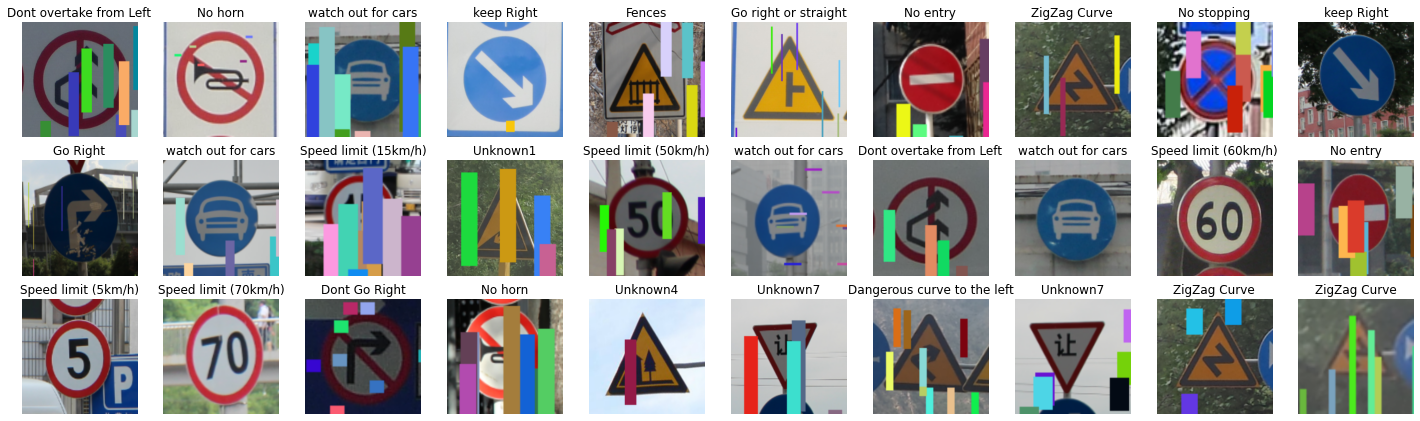

In [58]:
# sample images
plt.figure(figsize=(25, 25))
for images, labels in m_train_ds.take(1):
  for i in range(30):
    ax = plt.subplot(10, 10, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

plt.show()

## Transfer Learning LeNet5

## 50%

In [59]:
# Create a new model and add the LeNet layers up to the second to last layer
LeNet_transfer_model50 = tf.keras.Sequential()
for layer in LeNet_model.layers[:-2]:
    LeNet_transfer_model50.add(layer)

# Freeze the first half of the layers
for layer in LeNet_transfer_model50.layers[:int(len(LeNet_transfer_model50.layers)/2)]:
    layer.trainable = False

# Add a new dense layer with 58 units and a softmax activation function
LeNet_transfer_model50.add(layers.Dense(units=58, activation='softmax'))

# Compile the model with a loss function of SparseCategoricalCrossentropy and an Adam optimizer
LeNet_transfer_model50.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer='adam', metrics=['accuracy'])

# Set callback functions to early stop training 
mycallbacks = [EarlyStopping(monitor='val_loss', patience=5)]

# Train the model using the train_modified and val_modified datasets
hist_incept_le_59 = LeNet_transfer_model50.fit(m_train_ds, validation_data=m_val_ds, epochs=7, callbacks=mycallbacks)

Epoch 1/7
105/105 [==============================] - 8s 60ms/step - loss: 3.3630 - accuracy: 0.2266 - val_loss: 2.4591 - val_accuracy: 0.3333
Epoch 2/7
105/105 [==============================] - 6s 58ms/step - loss: 2.1866 - accuracy: 0.3867 - val_loss: 1.9571 - val_accuracy: 0.4724
Epoch 3/7
105/105 [==============================] - 6s 59ms/step - loss: 1.8451 - accuracy: 0.4799 - val_loss: 1.7458 - val_accuracy: 0.5180
Epoch 4/7
105/105 [==============================] - 6s 58ms/step - loss: 1.6472 - accuracy: 0.5123 - val_loss: 1.6145 - val_accuracy: 0.5659
Epoch 5/7
105/105 [==============================] - 6s 58ms/step - loss: 1.4923 - accuracy: 0.5531 - val_loss: 1.4391 - val_accuracy: 0.5971
Epoch 6/7
105/105 [==============================] - 6s 58ms/step - loss: 1.3602 - accuracy: 0.5959 - val_loss: 1.3999 - val_accuracy: 0.6091
Epoch 7/7
105/105 [==============================] - 6s 58ms/step - loss: 1.2814 - accuracy: 0.6163 - val_loss: 1.2878 - val_accuracy: 0.6463


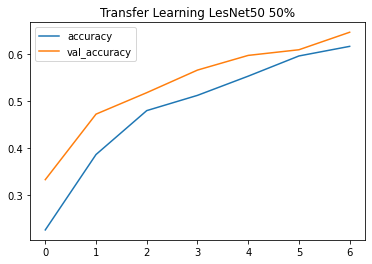

In [60]:
plt.title("Transfer Learning LesNet50 50%")
plt.plot(hist_incept_le_59.history['accuracy'])
plt.plot(hist_incept_le_59.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'],loc='best')

## 100%

In [61]:
# Create a new model and add the LeNet layers up to the second to last layer
LeNet_transfer_model100 = tf.keras.Sequential()
for layer in LeNet_model.layers[:-2]:
    LeNet_transfer_model100.add(layer)

# Freeze all of the layers
for layer in LeNet_transfer_model100.layers:
    layer.trainable = False

# Add a new dense layer with 58 units and a softmax activation function
LeNet_transfer_model100.add(layers.Dense(units=58, activation='softmax'))

# Compile the model with a loss function of SparseCategoricalCrossentropy and an Adam optimizer
LeNet_transfer_model100.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer='adam', metrics=['accuracy'])

# Set callback functions to early stop training 
mycallbacks = [EarlyStopping(monitor='val_loss', patience=5)]

# Train the model using the train_modified and val_modified datasets
hist_incept_le_100 = LeNet_transfer_model100.fit(m_train_ds, validation_data=m_val_ds, epochs=7, callbacks=mycallbacks)

Epoch 1/7
105/105 [==============================] - 8s 63ms/step - loss: 4.2930 - accuracy: 0.1652 - val_loss: 2.7880 - val_accuracy: 0.3022
Epoch 2/7
105/105 [==============================] - 6s 58ms/step - loss: 2.4436 - accuracy: 0.3552 - val_loss: 2.0602 - val_accuracy: 0.4496
Epoch 3/7
105/105 [==============================] - 6s 58ms/step - loss: 1.9035 - accuracy: 0.4463 - val_loss: 1.7657 - val_accuracy: 0.5264
Epoch 4/7
105/105 [==============================] - 6s 58ms/step - loss: 1.6657 - accuracy: 0.5099 - val_loss: 1.6036 - val_accuracy: 0.5911
Epoch 5/7
105/105 [==============================] - 6s 58ms/step - loss: 1.5248 - accuracy: 0.5495 - val_loss: 1.5023 - val_accuracy: 0.6031
Epoch 6/7
105/105 [==============================] - 6s 59ms/step - loss: 1.4249 - accuracy: 0.5908 - val_loss: 1.4273 - val_accuracy: 0.6175
Epoch 7/7
105/105 [==============================] - 6s 58ms/step - loss: 1.3651 - accuracy: 0.5962 - val_loss: 1.3762 - val_accuracy: 0.6283


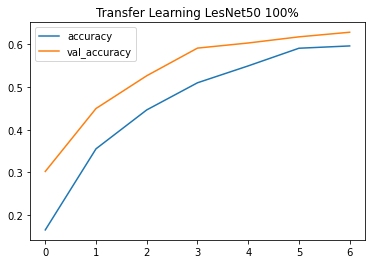

In [62]:
plt.title("Transfer Learning LesNet50 100%")
plt.plot(hist_incept_le_100.history['accuracy'])
plt.plot(hist_incept_le_100.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'],loc='best')

## Trasnfer Learning ResNet50

In [63]:
# Create a new model and add the ResNet50 layers up to the last convolutional block
resnet_transfer_model50 = tf.keras.Sequential()
for layer in res_model.layers[:-3]:
    resnet_transfer_model50.add(layer)

# Freeze the first half of the layers
for layer in resnet_transfer_model50.layers[:int(len(resnet_transfer_model50.layers)/2)]:
    layer.trainable = False

# Add a new dense layer with 58 units and a softmax activation function
resnet_transfer_model50.add(layers.Dense(units=58, activation='softmax'))

# Compile the model with a loss function of SparseCategoricalCrossentropy and an Adam optimizer
resnet_transfer_model50.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer='adam', metrics=['accuracy'])

# Set callback functions to early stop training 
mycallbacks = [EarlyStopping(monitor='val_loss', patience=5)]

# Train the model using the train_modified and val_modified datasets
hist_incept_res_50 = resnet_transfer_model50.fit(m_train_ds, validation_data=m_val_ds, epochs=7, callbacks=mycallbacks)

Epoch 1/7
105/105 [==============================] - 14s 88ms/step - loss: 3.5857 - accuracy: 0.1067 - val_loss: 3.4571 - val_accuracy: 0.1187
Epoch 2/7
105/105 [==============================] - 8s 78ms/step - loss: 3.4523 - accuracy: 0.1232 - val_loss: 3.3659 - val_accuracy: 0.1355
Epoch 3/7
105/105 [==============================] - 8s 78ms/step - loss: 3.3945 - accuracy: 0.1421 - val_loss: 3.3134 - val_accuracy: 0.1559
Epoch 4/7
105/105 [==============================] - 8s 78ms/step - loss: 3.3426 - accuracy: 0.1472 - val_loss: 3.2791 - val_accuracy: 0.1607
Epoch 5/7
105/105 [==============================] - 8s 78ms/step - loss: 3.3055 - accuracy: 0.1646 - val_loss: 3.2631 - val_accuracy: 0.1463
Epoch 6/7
105/105 [==============================] - 8s 78ms/step - loss: 3.2759 - accuracy: 0.1664 - val_loss: 3.2027 - val_accuracy: 0.1691
Epoch 7/7
105/105 [==============================] - 8s 78ms/step - loss: 3.2367 - accuracy: 0.1814 - val_loss: 3.2098 - val_accuracy: 0.1535


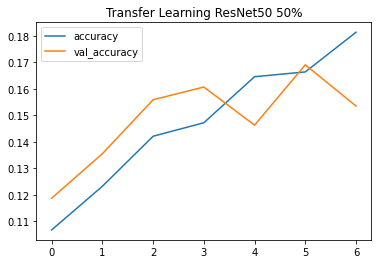

In [64]:
plt.title("Transfer Learning ResNet50 50%")
plt.plot(hist_incept_res_50.history['accuracy'])
plt.plot(hist_incept_res_50.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'],loc='best')

##100%

In [65]:
# Create a new model and add the ResNet50 layers up to the last convolutional block
resnet_transfer_model100 = tf.keras.Sequential()
for layer in res_model.layers[:-3]:
    resnet_transfer_model100.add(layer)

# Freeze all of the layers
for layer in resnet_transfer_model100.layers:
    layer.trainable = False

# Add a new dense layer with 58 units and a softmax activation function
resnet_transfer_model100.add(layers.Dense(units=58, activation='softmax'))

# Compile the model with a loss function of SparseCategoricalCrossentropy and an Adam optimizer
resnet_transfer_model100.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer='adam', metrics=['accuracy'])

# Set callback functions to early stop training 
mycallbacks = [EarlyStopping(monitor='val_loss', patience=5)]

# Train the model using the train_modified and val_modified datasets
hist_incept_res_100 = resnet_transfer_model100.fit(m_train_ds, validation_data=m_val_ds, epochs=7, callbacks=mycallbacks)

Epoch 1/7
105/105 [==============================] - 13s 88ms/step - loss: 3.5982 - accuracy: 0.1025 - val_loss: 3.4651 - val_accuracy: 0.1415
Epoch 2/7
105/105 [==============================] - 8s 78ms/step - loss: 3.4473 - accuracy: 0.1319 - val_loss: 3.3739 - val_accuracy: 0.1439
Epoch 3/7
105/105 [==============================] - 8s 78ms/step - loss: 3.3778 - accuracy: 0.1451 - val_loss: 3.3050 - val_accuracy: 0.1571
Epoch 4/7
105/105 [==============================] - 8s 79ms/step - loss: 3.3323 - accuracy: 0.1514 - val_loss: 3.2905 - val_accuracy: 0.1990
Epoch 5/7
105/105 [==============================] - 8s 79ms/step - loss: 3.2958 - accuracy: 0.1655 - val_loss: 3.2492 - val_accuracy: 0.1619
Epoch 6/7
105/105 [==============================] - 8s 78ms/step - loss: 3.2741 - accuracy: 0.1841 - val_loss: 3.2273 - val_accuracy: 0.1751
Epoch 7/7
105/105 [==============================] - 8s 78ms/step - loss: 3.2388 - accuracy: 0.1823 - val_loss: 3.2015 - val_accuracy: 0.1954


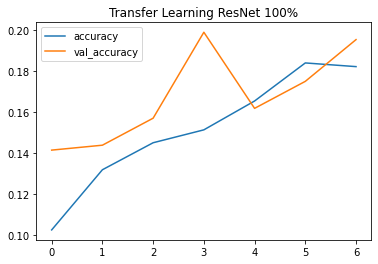

In [66]:
plt.title("Transfer Learning ResNet 100%")
plt.plot(hist_incept_res_100.history['accuracy'])
plt.plot(hist_incept_res_100.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'],loc='best')

## Transfer Learning VGG16 50%

In [67]:
# Create a new model and add the VGG16 layers up to the last convolutional block
vgg_transfer_model50 = tf.keras.Sequential()
for layer in vgg_model.layers[:-3]:
    vgg_transfer_model50.add(layer)

# Freeze the first half of the layers
for layer in vgg_transfer_model50.layers[:int(len(vgg_transfer_model50.layers)/2)]:
    layer.trainable = False

# Add a new dense layer with 58 units and a softmax activation function
vgg_transfer_model50.add(layers.Dense(units=58, activation='softmax'))

# Compile the model with a loss function of SparseCategoricalCrossentropy and an Adam optimizer
vgg_transfer_model50.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer='adam', metrics=['accuracy'])

# Set callback functions to early stop training 
mycallbacks = [EarlyStopping(monitor='val_loss', patience=5)]

# Train the model using the train_modified and val_modified datasets
hist_incept_vgg_50 = vgg_transfer_model50.fit(m_train_ds, validation_data=m_val_ds, epochs=7, callbacks=mycallbacks)

Epoch 1/7
105/105 [==============================] - 10s 82ms/step - loss: 3.5370 - accuracy: 0.1028 - val_loss: 3.2256 - val_accuracy: 0.1511
Epoch 2/7
105/105 [==============================] - 8s 79ms/step - loss: 3.0703 - accuracy: 0.2179 - val_loss: 2.9421 - val_accuracy: 0.2290
Epoch 3/7
105/105 [==============================] - 8s 79ms/step - loss: 2.7970 - accuracy: 0.2920 - val_loss: 2.7282 - val_accuracy: 0.2962
Epoch 4/7
105/105 [==============================] - 8s 79ms/step - loss: 2.5889 - accuracy: 0.3567 - val_loss: 2.5557 - val_accuracy: 0.3513
Epoch 5/7
105/105 [==============================] - 8s 79ms/step - loss: 2.4231 - accuracy: 0.4044 - val_loss: 2.4247 - val_accuracy: 0.3861
Epoch 6/7
105/105 [==============================] - 8s 79ms/step - loss: 2.3004 - accuracy: 0.4382 - val_loss: 2.3139 - val_accuracy: 0.4101
Epoch 7/7
105/105 [==============================] - 8s 79ms/step - loss: 2.1810 - accuracy: 0.4823 - val_loss: 2.2212 - val_accuracy: 0.4688


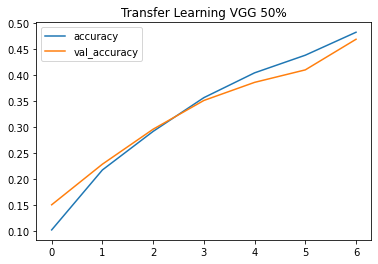

In [68]:
plt.title("Transfer Learning VGG 50%")
plt.plot(hist_incept_vgg_50.history['accuracy'])
plt.plot(hist_incept_vgg_50.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'],loc='best')

## 100%

In [69]:
# Create a new model and add the VGG16 layers up to the last convolutional block
vgg_transfer_model100 = tf.keras.Sequential()
for layer in vgg_model.layers[:-3]:
    vgg_transfer_model100.add(layer)

# Freeze the layers of the new model
for layer in vgg_transfer_model100.layers:
    layer.trainable = False

# Add a new dense layer with 58 units and a softmax activation function
vgg_transfer_model100.add(layers.Dense(units=58, activation='softmax'))

# Compile the model with a loss function of SparseCategoricalCrossentropy and an Adam optimizer
vgg_transfer_model100.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer='adam', metrics=['accuracy'])

# Set callback functions to early stop training 
mycallbacks = [EarlyStopping(monitor='val_loss', patience=5)]

# Train the model using the train_modified and val_modified datasets
hist_incept_vgg_100 = vgg_transfer_model100.fit(m_train_ds, validation_data=m_val_ds, epochs=7, callbacks=mycallbacks)

Epoch 1/7
105/105 [==============================] - 10s 81ms/step - loss: 3.4795 - accuracy: 0.1271 - val_loss: 3.2303 - val_accuracy: 0.1942
Epoch 2/7
105/105 [==============================] - 8s 79ms/step - loss: 3.0488 - accuracy: 0.2266 - val_loss: 2.9493 - val_accuracy: 0.2554
Epoch 3/7
105/105 [==============================] - 8s 79ms/step - loss: 2.7839 - accuracy: 0.2836 - val_loss: 2.7382 - val_accuracy: 0.2914
Epoch 4/7
105/105 [==============================] - 8s 79ms/step - loss: 2.5744 - accuracy: 0.3513 - val_loss: 2.5625 - val_accuracy: 0.3153
Epoch 5/7
105/105 [==============================] - 8s 79ms/step - loss: 2.4133 - accuracy: 0.4056 - val_loss: 2.4277 - val_accuracy: 0.3705
Epoch 6/7
105/105 [==============================] - 8s 79ms/step - loss: 2.2744 - accuracy: 0.4484 - val_loss: 2.3153 - val_accuracy: 0.4101
Epoch 7/7
105/105 [==============================] - 8s 79ms/step - loss: 2.1755 - accuracy: 0.4721 - val_loss: 2.2164 - val_accuracy: 0.4712


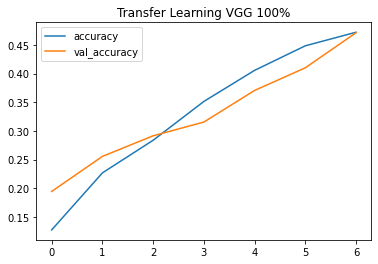

In [70]:
plt.title("Transfer Learning VGG 100%")
plt.plot(hist_incept_vgg_100.history['accuracy'])
plt.plot(hist_incept_vgg_100.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'],loc='best')

## Transfer Learning InceptionV3 50%

In [71]:
# Create a new model and add the InceptionV3 layers up to the last convolutional block
inception_transfer_model50 = tf.keras.Sequential()
for layer in inception_model.layers[:-3]:
    inception_transfer_model50.add(layer)

# Freeze the first half of the layers
for layer in inception_transfer_model50.layers[:int(len(inception_transfer_model50.layers)/2)]:
    layer.trainable = False

# Add a new dense layer with 58 units and a softmax activation function
inception_transfer_model50.add(layers.Dense(units=58, activation='softmax'))

# Compile the model with a loss function of SparseCategoricalCrossentropy and an Adam optimizer
inception_transfer_model50.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer='adam', metrics=['accuracy'])

# Set callback functions to early stop training 
mycallbacks = [EarlyStopping(monitor='val_loss', patience=5)]

# Train the model using the train_modified and val_modified datasets
hist_incept_ince_50 = inception_transfer_model50.fit(m_train_ds, validation_data=m_val_ds, epochs=7, callbacks=mycallbacks)

Epoch 1/7
105/105 [==============================] - 14s 88ms/step - loss: 2.4982 - accuracy: 0.3858 - val_loss: 1.8463 - val_accuracy: 0.5240
Epoch 2/7
105/105 [==============================] - 8s 74ms/step - loss: 1.4597 - accuracy: 0.6049 - val_loss: 1.4490 - val_accuracy: 0.6043
Epoch 3/7
105/105 [==============================] - 8s 75ms/step - loss: 1.2145 - accuracy: 0.6643 - val_loss: 1.3299 - val_accuracy: 0.6271
Epoch 4/7
105/105 [==============================] - 8s 74ms/step - loss: 1.0776 - accuracy: 0.6865 - val_loss: 1.1646 - val_accuracy: 0.6715
Epoch 5/7
105/105 [==============================] - 8s 74ms/step - loss: 0.9268 - accuracy: 0.7299 - val_loss: 1.1070 - val_accuracy: 0.6859
Epoch 6/7
105/105 [==============================] - 8s 75ms/step - loss: 0.8596 - accuracy: 0.7500 - val_loss: 1.0536 - val_accuracy: 0.6918
Epoch 7/7
105/105 [==============================] - 8s 75ms/step - loss: 0.8050 - accuracy: 0.7611 - val_loss: 0.9996 - val_accuracy: 0.7002


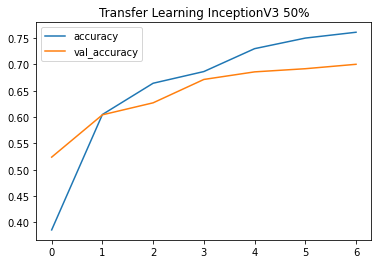

In [72]:
plt.title("Transfer Learning InceptionV3 50%")
plt.plot(hist_incept_ince_50.history['accuracy'])
plt.plot(hist_incept_ince_50.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'],loc='best')

## 100%

In [73]:
# Create a new model and add the InceptionV3 layers up to the last convolutional block
inception_transfer_model100 = tf.keras.Sequential()
for layer in inception_model.layers[:-3]:
    inception_transfer_model100.add(layer)

# Freeze the layers of the new model
for layer in inception_transfer_model100.layers:
    layer.trainable = False

# Add a new dense layer with 58 units and a softmax activation function
inception_transfer_model100.add(layers.Dense(units=58, activation='softmax'))

# Compile the model with a loss function of SparseCategoricalCrossentropy and an Adam optimizer
inception_transfer_model100.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer='adam', metrics=['accuracy'])

# Set callback functions to early stop training 
mycallbacks = [EarlyStopping(monitor='val_loss', patience=5)]

# Train the model using the train_modified and val_modified datasets
hist_incept_ince_100 = inception_transfer_model100.fit(m_train_ds, validation_data=m_val_ds, epochs=7, callbacks=mycallbacks)

Epoch 1/7
105/105 [==============================] - 14s 87ms/step - loss: 2.5123 - accuracy: 0.3885 - val_loss: 1.8563 - val_accuracy: 0.5132
Epoch 2/7
105/105 [==============================] - 8s 75ms/step - loss: 1.4635 - accuracy: 0.6100 - val_loss: 1.4373 - val_accuracy: 0.6247
Epoch 3/7
105/105 [==============================] - 8s 75ms/step - loss: 1.2010 - accuracy: 0.6592 - val_loss: 1.2312 - val_accuracy: 0.6691
Epoch 4/7
105/105 [==============================] - 8s 75ms/step - loss: 1.0383 - accuracy: 0.7095 - val_loss: 1.1814 - val_accuracy: 0.6679
Epoch 5/7
105/105 [==============================] - 8s 75ms/step - loss: 0.9504 - accuracy: 0.7224 - val_loss: 1.1041 - val_accuracy: 0.6739
Epoch 6/7
105/105 [==============================] - 8s 75ms/step - loss: 0.8441 - accuracy: 0.7605 - val_loss: 1.0560 - val_accuracy: 0.6942
Epoch 7/7
105/105 [==============================] - 8s 75ms/step - loss: 0.8007 - accuracy: 0.7671 - val_loss: 0.9998 - val_accuracy: 0.7218


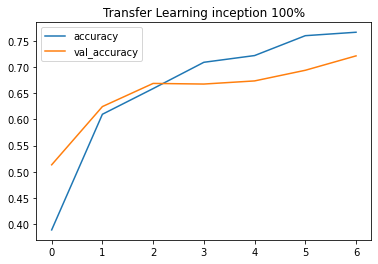

In [83]:
plt.title("Transfer Learning inception 100%")
plt.plot(hist_incept_ince_100.history['accuracy'])
plt.plot(hist_incept_ince_100.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'],loc='best')

## Transfer Learning 50% accuracy





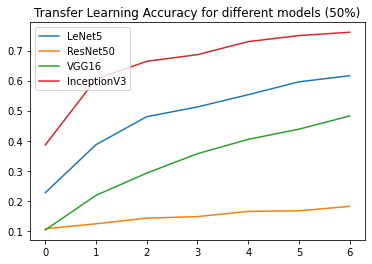

In [79]:
plt.title("Transfer Learning Accuracy for different models (50%)")
plt.plot(hist_incept_le_59.history['accuracy'],label = "LeNet5")
plt.plot(hist_incept_res_50.history['accuracy'],label = "ResNet50")
plt.plot(hist_incept_vgg_50.history['accuracy'],label = "VGG16")
plt.plot(hist_incept_ince_50.history['accuracy'],label = "InceptionV3")
plt.legend()
plt.show()

## Transfer Learning 100% accuracy


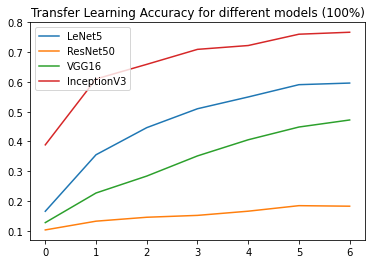

In [80]:
plt.title("Transfer Learning Accuracy for different models (100%)")
plt.plot(hist_incept_le_100.history['accuracy'],label = "LeNet5")
plt.plot(hist_incept_res_100.history['accuracy'],label = "ResNet50")
plt.plot(hist_incept_vgg_100.history['accuracy'],label = "VGG16")
plt.plot(hist_incept_ince_100.history['accuracy'],label = "InceptionV3")
plt.legend()
plt.show()

## Transfer Learning 50% Validation Accuracy

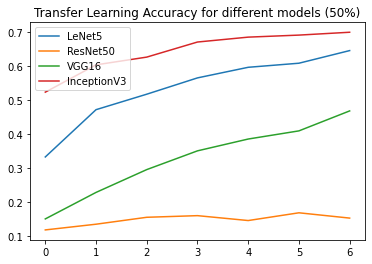

In [81]:
plt.title("Transfer Learning Accuracy for different models (50%)")
plt.plot(hist_incept_le_59.history['val_accuracy'],label = "LeNet5")
plt.plot(hist_incept_res_50.history['val_accuracy'],label = "ResNet50")
plt.plot(hist_incept_vgg_50.history['val_accuracy'],label = "VGG16")
plt.plot(hist_incept_ince_50.history['val_accuracy'],label = "InceptionV3")
plt.legend()
plt.show()

## Transfer Learning 100& Validation Accuracy

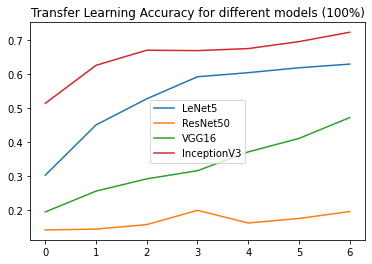

In [82]:
plt.title("Transfer Learning Accuracy for different models (100%)")
plt.plot(hist_incept_le_100.history['val_accuracy'],label = "LeNet5")
plt.plot(hist_incept_res_100.history['val_accuracy'],label = "ResNet50")
plt.plot(hist_incept_vgg_100.history['val_accuracy'],label = "VGG16")
plt.plot(hist_incept_ince_100.history['val_accuracy'],label = "InceptionV3")
plt.legend()
plt.show()